___
# PROJETO 2: <p> <center> Análise Exploratória de Dados 
___
    
### Integrantes: <br>
    1.  
    2. 
    3. 
    4. 
    5.

___
<div id="indice"></div>

## Índice

- [LEITURA DA BASE DE DADOS](#leitura)
- [PREPARO DA BASE DE DADOS](#preparo)
- [ANÁLISE EXPLORATÓRIA DE DADOS](#AED)
  - [1. Validando a consistência dos dados](#AED1)
  - [2. Analisar relação entre as variáveis explicativas qualitativas com preço do aluguel](#AED2)
  - [3. Analisar relação entre as variáveis explicativas quantitativas com preço do aluguel](#AED3)
  - [4. Analisar relação entre área e valor do aluguel para imóveis mobiliados e não mobiliados](#AED4)

In [1]:
%matplotlib inline
import math
import os

import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import pandas as pd

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

from IPython.display import display  # Para ter melhor print.

<div id="leitura"></div>

## LEITURA DA BASE DE DADOS

In [2]:
## print("Esperamos trabalhar no diretório")
print(os.getcwd())

C:\Users\dedal\Jupyter\CDados\Projetos\Projeto 2


In [3]:
filename = 'Proj2.xlsx'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook da avaliação, yay!\n')
    
else:
    print(f'Não encontrei o arquivo {filename}.\n'
          f'O notebook e os arquivos de dados desta avaliação devem ser salvos dentro da mesma pasta no seu computador.\n')

Parece que o arquivo Proj2.xlsx está na mesma pasta do notebook da avaliação, yay!



In [4]:
# Carregando os dados
df = pd.read_excel(filename)
df.head()

,cidade,area,comodos,banheiros,vagas,andar,pets,mobiliado,condominio,IPTU,seguro,aluguel
0,São Paulo,70,2,1,1,7,aceita,mobiliado,2065,211,42,3300
1,São Paulo,320,4,4,0,20,aceita,nao mobiliado,1200,1750,63,4960
2,Porto Alegre,51,2,1,0,2,aceita,nao mobiliado,270,22,17,1112
3,Rio de Janeiro,72,2,1,0,7,aceita,nao mobiliado,740,85,25,1900
4,São Paulo,213,4,4,4,4,aceita,nao mobiliado,2254,1735,41,3223


[Volta ao Índice](#indice)

<div id="preparo"></div>

## PREPARO DA BASE DE DADOS

**IMPORTANTE:** Certifique-se de que o dataframe esteja reconhecendo corretamente as variáveis qualitativas, de acordo com o dicionário fornecido no enunciado. Caso não esteja, faça essa transformação conforme visto em aulas.

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.dtypes

cidade        object
area           int64
comodos        int64
banheiros      int64
vagas          int64
andar          int64
pets          object
mobiliado     object
condominio     int64
IPTU           int64
seguro         int64
aluguel        int64
dtype: object

[Volta ao Índice](#indice)

<div id="AED"></div>

## ANÁLISE EXPLORATÓRIA DE DADOS

Utilize ferramentas estatísticas **GRÁFICAS** e/ou **TABELAS NUMÉRICAS** que permitam explorar o conjunto de dados frente aos objetivos descritos no enunciado. <br>
Lembre que os gráficos e tabelas devem ser coladas no relatório (arquivo docx), junto com as interpretações necessárias.


<div id="AED1"></div>

### 1.	Validando a consistência dos dados

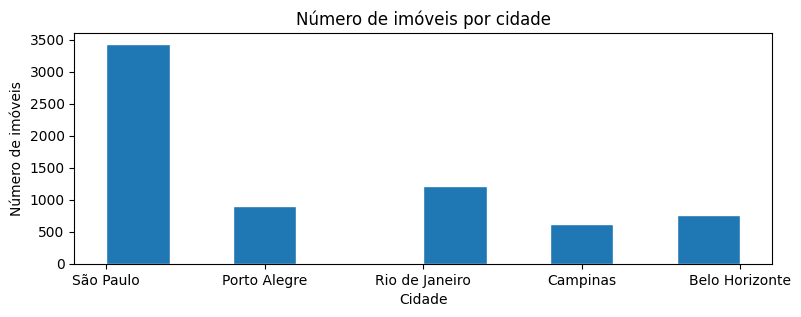

cidade
São Paulo         0.494464
Rio de Janeiro    0.175557
Porto Alegre      0.130410
Belo Horizonte    0.109993
Campinas          0.089576
Name: proportion, dtype: float64

In [150]:
# análise cidade
plt.figure(figsize=(9,3))
plt.hist(df.cidade, edgecolor='white')
plt.title('Número de imóveis por cidade')
plt.ylabel('Número de imóveis')
plt.xlabel('Cidade')
plt.show()
df.cidade.value_counts(True)

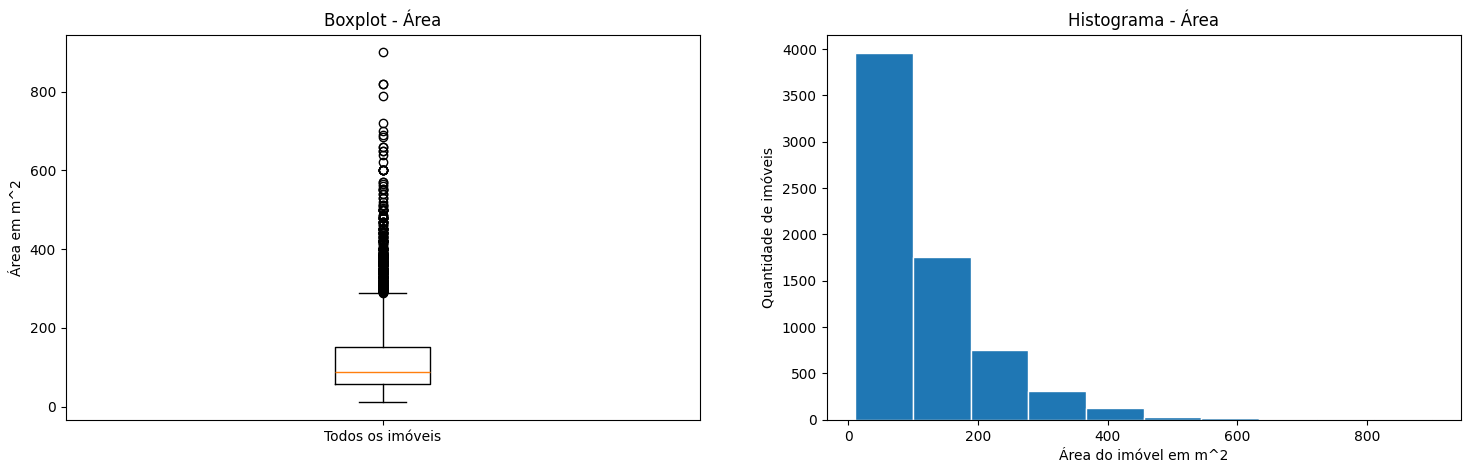

count    6955.000000
mean      118.997843
std        92.695740
min        11.000000
25%        58.000000
50%        87.000000
75%       150.000000
max       900.000000
Name: area, dtype: float64

In [84]:
# análise área
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.boxplot(df.area, labels=['Todos os imóveis'])
plt.title('Boxplot - Área')
plt.ylabel('Área em m^2')

plt.subplot(1,2,2)
plt.hist(df.area, edgecolor='white')
plt.title('Histograma - Área')
plt.ylabel('Quantidade de imóveis')
plt.xlabel('Área do imóvel em m^2')
plt.show()
df.area.describe()

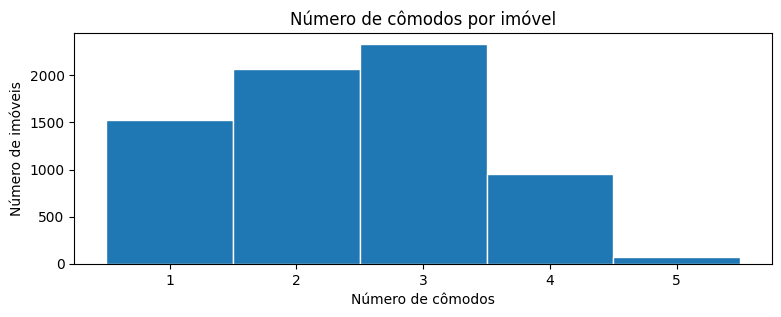

comodos
1    0.219698
2    0.296621
3    0.335873
4    0.136880
5    0.010927
Name: proportion, dtype: float64

In [152]:
# análise cômodos
plt.figure(figsize=(9,3))
plt.hist(df.comodos, bins=np.arange(0.5,6,1), edgecolor='white')
plt.title('Número de cômodos por imóvel')
plt.ylabel('Número de imóveis')
plt.xlabel('Número de cômodos')
plt.show()
df.comodos.value_counts(True).sort_index()

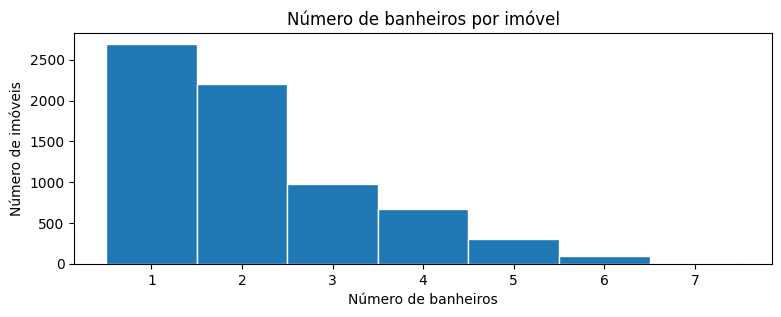

banheiros
1    0.387635
2    0.316607
3    0.140331
4    0.096765
5    0.043710
6    0.012940
7    0.002013
Name: proportion, dtype: float64

In [153]:
# análise banheiros
plt.figure(figsize=(9,3))
plt.hist(df.banheiros, bins=np.arange(0.5,8,1), edgecolor='white')
plt.title('Número de banheiros por imóvel')
plt.ylabel('Número de imóveis')
plt.xlabel('Número de banheiros')
plt.show()
df.banheiros.value_counts(True).sort_index()

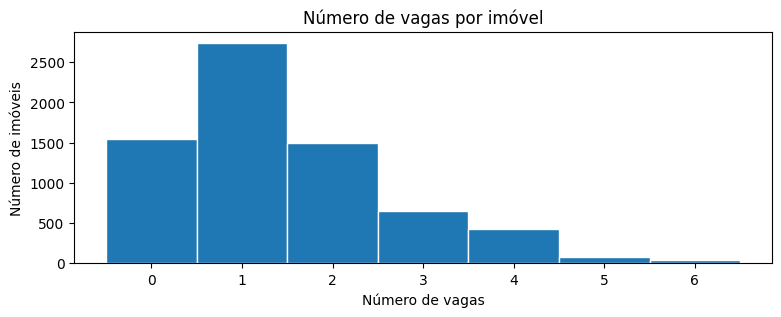

vagas
0    0.221711
1    0.393386
2    0.214809
3    0.092595
4    0.061107
5    0.010927
6    0.005464
Name: proportion, dtype: float64

In [154]:
# análise vagas
plt.figure(figsize=(9,3))
plt.hist(df.vagas, bins=np.arange(-0.5,7,1), edgecolor='white')
plt.title('Número de vagas por imóvel')
plt.ylabel('Número de imóveis')
plt.xlabel('Número de vagas')
plt.show()
df.vagas.value_counts(True).sort_index()

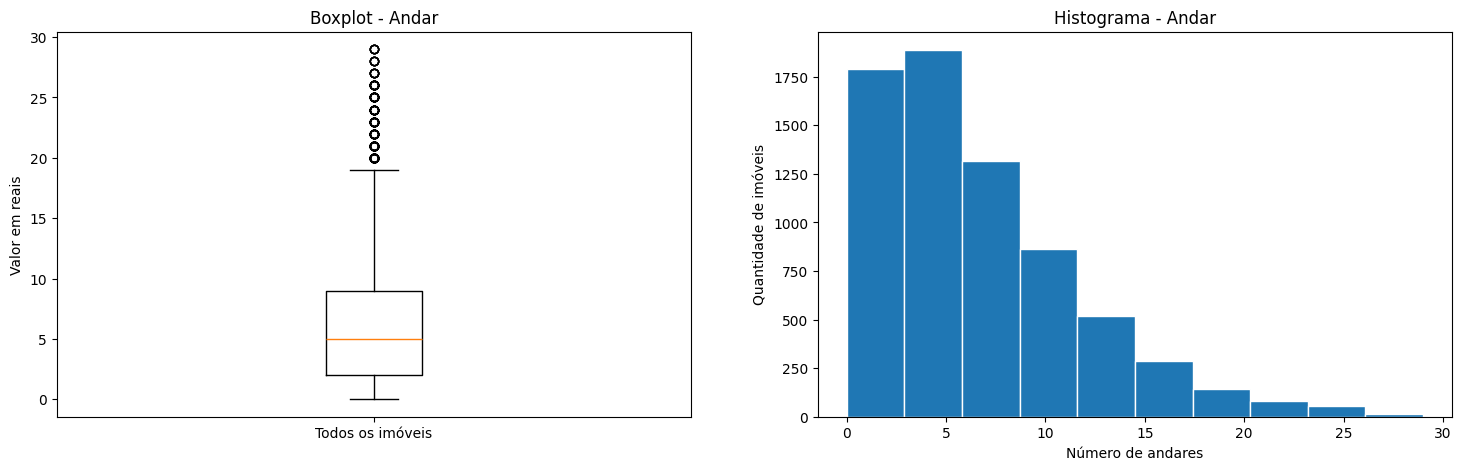

count    6955.000000
mean        6.452768
std         5.232463
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        29.000000
Name: andar, dtype: float64

In [142]:
# análise andar
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.boxplot(df.andar, labels=['Todos os imóveis'])
plt.title('Boxplot - Andar')
plt.ylabel('Valor em reais')

plt.subplot(1,2,2)
plt.hist(df.andar, edgecolor='white')
plt.title('Histograma - Andar')
plt.ylabel('Quantidade de imóveis')
plt.xlabel('Número de andares')
plt.show()
df.andar.describe()

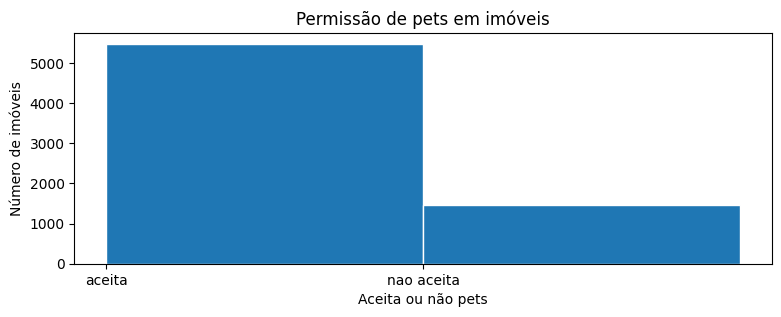

pets
aceita        0.788354
nao aceita    0.211646
Name: proportion, dtype: float64

In [155]:
# análise pets
plt.figure(figsize=(9,3))
plt.hist(df.pets, bins=np.arange(0,3,1), edgecolor='white')
plt.title('Permissão de pets em imóveis')
plt.ylabel('Número de imóveis')
plt.xlabel('Aceita ou não pets')
plt.show()
df.pets.value_counts(True).sort_index()

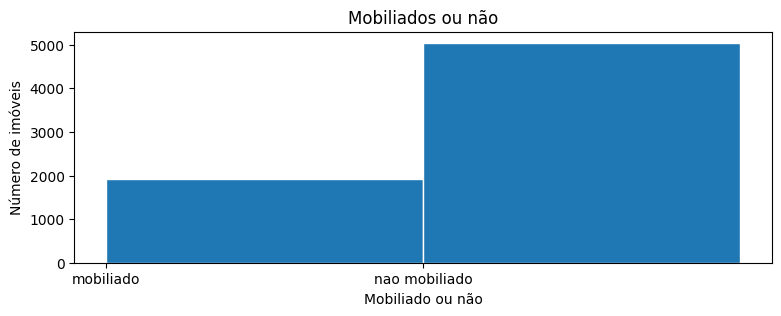

mobiliado
mobiliado        0.274623
nao mobiliado    0.725377
Name: proportion, dtype: float64

In [156]:
# análise mobiliado
plt.figure(figsize=(9,3))
plt.hist(df.mobiliado, bins=np.arange(0,3,1), edgecolor='white')
plt.title('Mobiliados ou não')
plt.ylabel('Número de imóveis')
plt.xlabel('Mobiliado ou não')
plt.show()
df.mobiliado.value_counts(True).sort_index()

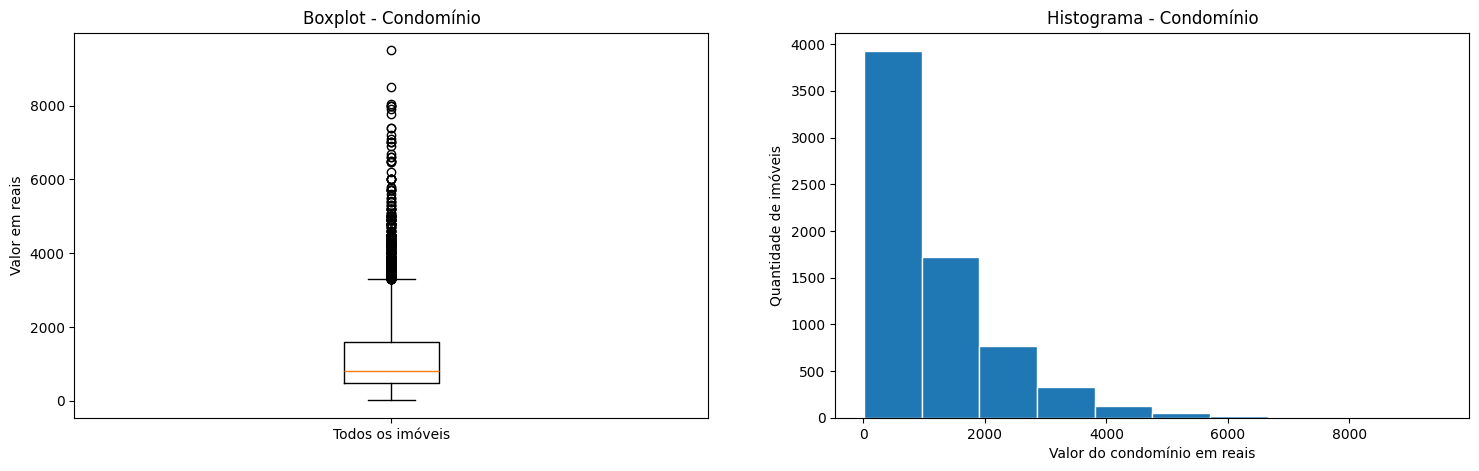

count    6955.000000
mean     1185.576276
std      1045.696947
min        15.000000
25%       470.000000
50%       808.000000
75%      1600.000000
max      9500.000000
Name: condominio, dtype: float64

In [138]:
# análise condomínio
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.boxplot(df.condominio, labels=['Todos os imóveis'])
plt.title('Boxplot - Condomínio')
plt.ylabel('Valor em reais')

plt.subplot(1,2,2)
plt.hist(df.condominio, edgecolor='white')
plt.title('Histograma - Condomínio')
plt.ylabel('Quantidade de imóveis')
plt.xlabel('Valor do condomínio em reais')
plt.show()
df.condominio.describe()

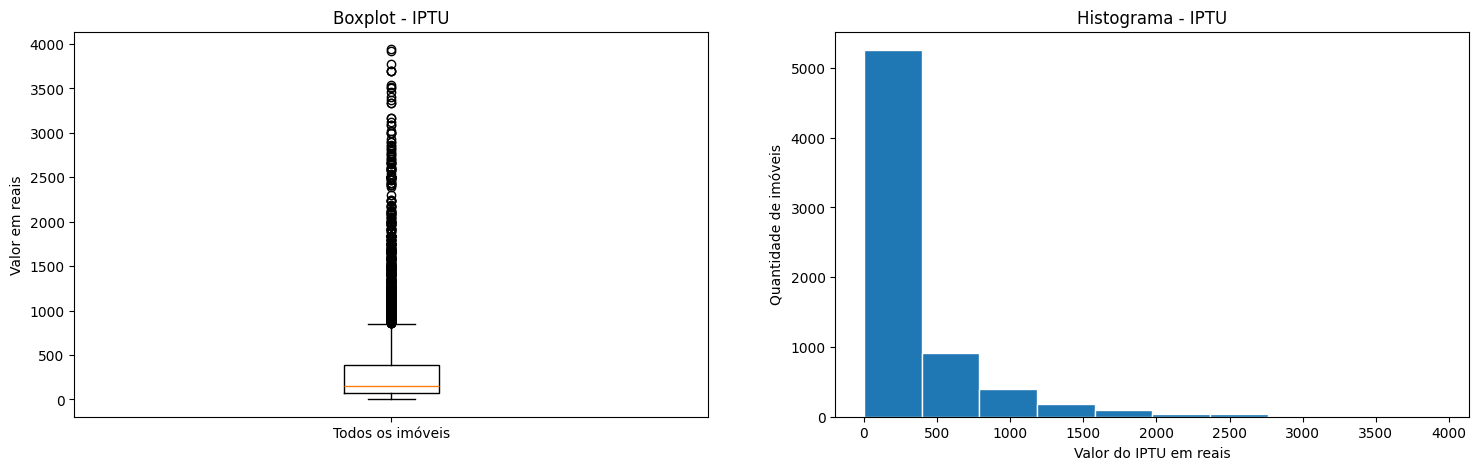

count    6955.000000
mean      324.445579
std       456.472760
min         2.000000
25%        67.000000
50%       148.000000
75%       383.000000
max      3942.000000
Name: IPTU, dtype: float64

In [139]:
# análise IPTU
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.boxplot(df.IPTU, labels=['Todos os imóveis'])
plt.title('Boxplot - IPTU')
plt.ylabel('Valor em reais')

plt.subplot(1,2,2)
plt.hist(df.IPTU, edgecolor='white')
plt.title('Histograma - IPTU')
plt.ylabel('Quantidade de imóveis')
plt.xlabel('Valor do IPTU em reais')
plt.show()
df.IPTU.describe()

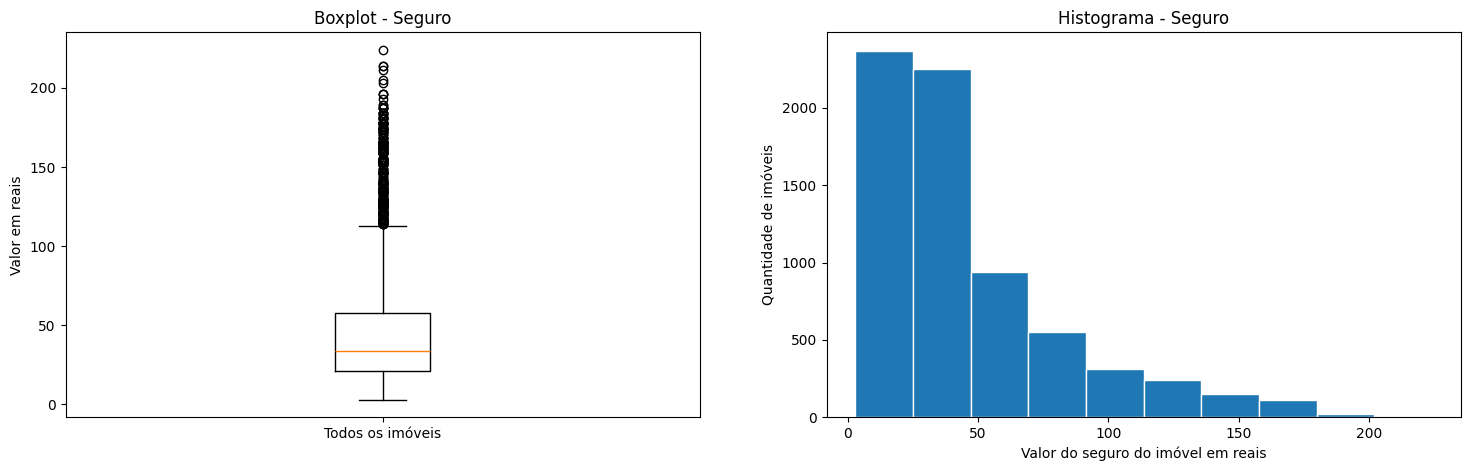

count    6955.000000
mean       46.741050
std        36.743842
min         3.000000
25%        21.000000
50%        34.000000
75%        58.000000
max       224.000000
Name: seguro, dtype: float64

In [79]:
# análise seguro
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.boxplot(df.seguro, labels=['Todos os imóveis'])
plt.title('Boxplot - Seguro')
plt.ylabel('Valor em reais')

plt.subplot(1,2,2)
plt.hist(df.seguro, edgecolor='white')
plt.title('Histograma - Seguro')
plt.ylabel('Quantidade de imóveis')
plt.xlabel('Valor do seguro do imóvel em reais')
plt.show()
df.seguro.describe()

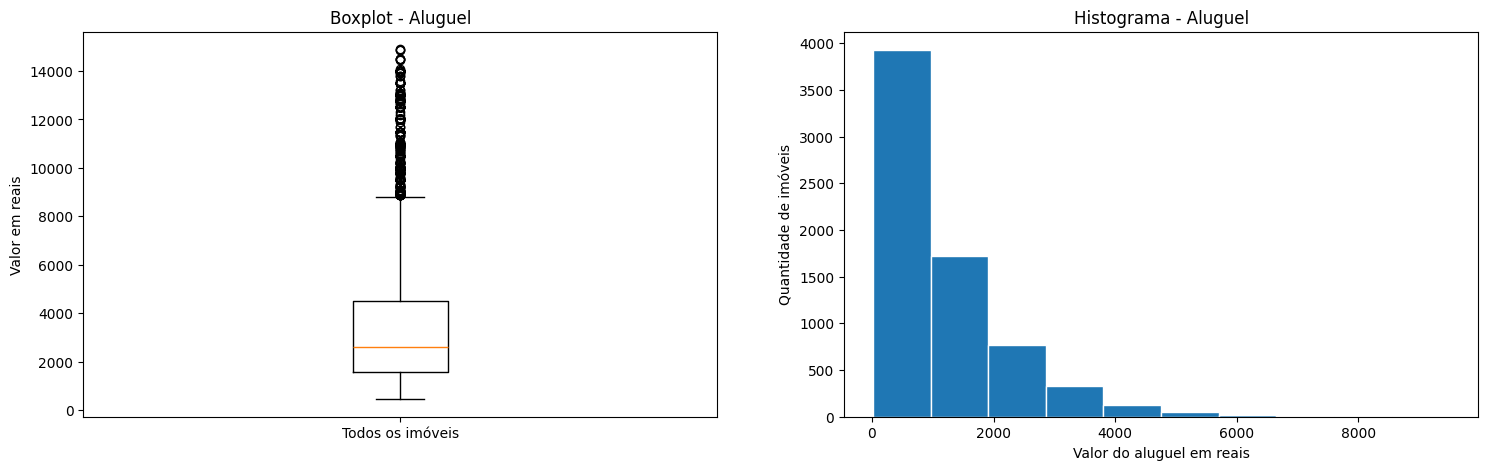

count     6955.000000
mean      3572.889145
std       2838.954414
min        450.000000
25%       1584.500000
50%       2600.000000
75%       4500.000000
max      14900.000000
Name: aluguel, dtype: float64

In [140]:
# análise aluguel
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.boxplot(df.aluguel, labels=['Todos os imóveis'])
plt.title('Boxplot - Aluguel')
plt.ylabel('Valor em reais')

plt.subplot(1,2,2)
plt.hist(df.condominio, edgecolor='white')
plt.title('Histograma - Aluguel')
plt.ylabel('Quantidade de imóveis')
plt.xlabel('Valor do aluguel em reais')
plt.show()
df.aluguel.describe()

<div id="AED2"></div>

### 2.	Analisar relação entre as variáveis explicativas qualitativas com preço do aluguel 

<div id="AED3"></div>

### 3.	Analisar relação entre as variáveis explicativas quantitativas com preço do aluguel 

<div id="AED4"></div>

### 4.	Analisar relação entre área e valor do aluguel para imóveis mobiliados e não mobiliados 

[Volta ao Índice](#indice)